In [1]:
#Connect to our own Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


https://pypi.org/project/sentence-transformers/

In [2]:
%cd "/content/gdrive/My Drive/ProjetNLPQuora/"
!ls

/content/gdrive/My Drive/ProjetNLPQuora
 bert-master  'test (1).csv'   test.csv   train.csv


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [66]:
df_train = df_train.dropna()
df_train.shape[0]

404287

In [7]:
! pip install sentence-transformers

     |████████████████████████████████| 61kB 1.9MB/s 
     |████████████████████████████████| 573kB 6.4MB/s 
     |████████████████████████████████| 3.7MB 12.7MB/s 
     |████████████████████████████████| 1.0MB 44.5MB/s 
     |████████████████████████████████| 890kB 41.8MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.2.6.1-cp36-none-any.whl size=74031 sha256=4e3fcf309948e5e85118494f929b31c67499ef5125711c06a5d4f2c07a0b3bcb
  Stored in directory: /root/.cache/pip/wheels/d7/fa/17/2b081a8cd8b0a86753fb0e9826b3cc19f0207062c0b2da7008
  Created wheel for sacremoses: filename=sacremoses-0.0.41-cp36-none-any.whl size=893334 sha256=63d8ed18665635638be3b0f165d647d5af88c4e7a4da476a1a229db099fc9696
  Stored in directory: /root/.cache/pip/wheels/22/5a/d4/b020a81249de7dc63758a34222feaa668dbe8ebfe9170cc9b1
Successfully built sentence-transformers sacremoses


In [8]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

100%|██████████| 405M/405M [00:46<00:00, 8.76MB/s]


In [0]:
df_train["question1"] = df_train["question1"].astype("str")
df_train["question2"] = df_train["question2"].astype('str')

In [0]:
q1 = df_train['question1'].tolist()
q2 = df_train['question2'].tolist()

In [69]:
t1 = time.time()
print("Computing embeddings for q1 ")
embq1 = model.encode(q1)
t2 = time.time()-t1
print(t2,"seconds", t2/60, "minutes" )

t3 = time.time()
print("Computing embeddings for q2 ")
embq2 = model.encode(q2)
t4 = time.time()-t3
print(t4,"seconds", t4/60, "minutes" )

print('Total time',time.time()-t1,"seconds", (time.time()-t1)/60, "minutes" )

Computing embeddings for q1 
556.3802638053894 seconds 9.27300439675649 minutes
Computing embeddings for q2 
553.7793772220612 seconds 9.229656287034352 minutes
Total time 1110.160798549652 seconds 18.502679987748465 minutes


In [0]:
df_train['emb1'] = embq1
df_train['emb2'] = embq2

In [77]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate,emb1,emb2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[-0.009722535, -0.321623, 0.9211389, 0.1262948...","[0.15146343, -0.20154336, 0.9581176, 0.0159404..."
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[0.2738672, 0.47279078, -0.66235507, 0.1045283...","[0.19313534, 0.091349654, -1.0451199, 0.503202..."
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[-0.20832886, -0.15172546, 1.1032252, 0.248804...","[0.27955183, 0.0012333489, -0.03924351, 0.3699..."
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[-0.37513205, 0.6043533, 1.2448618, 0.33625403...","[-0.120156094, -0.025693519, 0.54352605, 0.360..."
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[-0.30344826, 1.319379, -0.1772627, 0.3490297,...","[0.1113384, -0.06698414, -0.10810449, 0.350687..."


In [82]:
csv = df_train.to_csv('train_vectorized.csv')


KeyboardInterrupt: ignored

In [70]:
sim = []
for i in range(df_train.shape[0]):
  if (i % 50000 == 0):
    print(100 * i/df_train.shape[0], "% done")
  cosine = np.dot(embq1[i],embq2[i].transpose()) / (np.linalg.norm(embq1[i]) * np.linalg.norm(embq2[i]))
  #sim.append(1/(1 + math.exp(-100*(cosine - 0.85))))
  sim.append(cosine)

0.0 % done
12.367451834958828 % done
24.734903669917657 % done
37.102355504876485 % done
49.46980733983531 % done
61.83725917479414 % done
74.20471100975297 % done
86.5721628447118 % done
98.93961467967063 % done


In [0]:
th = []
for i in range(200):
  t = .8 + 0.001*i
  dupl2 = (np.asarray(sim)>t)*1 
  th.append(sum(df_train['is_duplicate']== dupl2)/df_train.shape[0])

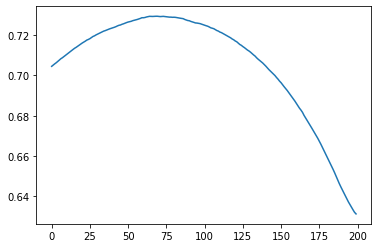

In [74]:
from matplotlib import pyplot as plt
plt.plot(th)

In [0]:
# Notes : avec embeddings pre trained 73 = pas mal 
# Tester les differents seuils peut s'apparenter a la phase de train. 
# Meilleure accuracy avec seuil de ~0.875 